## Fase 2

In [2]:
import pandas as pd

In [3]:
# Cargamos el dataset desde un archivo CSV local
df = pd.read_csv("COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_46110/3356739288.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")


In [110]:
df

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387140,2021-10-24 00:00:00,4990088,2021-10-19 00:00:00,76,VALLE,76520,PALMIRA,37,1,M,...,NaN,NaN,Recuperado,2021-10-13 00:00:00,NaN,2021-10-23 00:00:00,2021-10-27 00:00:00,Tiempo,6.0,NaN
6387141,2021-10-24 00:00:00,4990091,2021-10-23 00:00:00,76,VALLE,76520,PALMIRA,36,1,M,...,NaN,NaN,Recuperado,2021-10-16 00:00:00,NaN,2021-10-23 00:00:00,2021-10-30 00:00:00,Tiempo,6.0,NaN
6387142,2021-10-24 00:00:00,4990092,2021-10-19 00:00:00,76,VALLE,76364,JAMUNDI,39,1,F,...,NaN,NaN,Recuperado,2021-10-18 00:00:00,NaN,2021-10-23 00:00:00,2021-11-01 00:00:00,Tiempo,6.0,NaN
6387143,2021-10-24 00:00:00,4990095,2021-11-05 00:00:00,76,VALLE,76364,JAMUNDI,43,1,F,...,NaN,NaN,Recuperado,2021-10-21 00:00:00,NaN,2021-10-23 00:00:00,2021-11-04 00:00:00,PCR,6.0,NaN


In [111]:
# Analizamos los datos faltantes de cada una de las columnas del dataframe
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

,Faltantes,%
Código ISO del país,6383439,99.941977
Nombre del país,6383431,99.941852
Nombre del grupo étnico,6303291,98.687144
Fecha de muerte,6202835,97.114360
Fecha de inicio de síntomas,505292,7.911078
Tipo de recuperación,180390,2.824267
Fecha de recuperación,180316,2.823108
Estado,41200,0.645046
Ubicación del caso,41200,0.645046
Recuperado,36260,0.567703


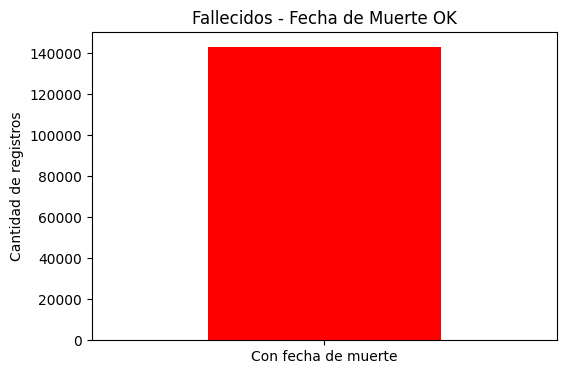

(143110, 23)

In [112]:
# Revisar graficamente la cantidad de campos faltantes (NaN) en la columna "Fecha de muerte" para el Estado "Fallecido", con esto, podemos concluir
# si es necesario eliminar la columna o no es necesario para próximos análisis

import matplotlib.pyplot as plt

# Filtrar solo los fallecidos
df_fallecidos = df[df["Estado"] == "Fallecido"]

# Contar nulos y no nulos en la columna fecha de muerte
conteo = df_fallecidos["Fecha de muerte"].isnull().value_counts()

# Renombrar los índices: True = Sin fecha, False = Con fecha
labels_map = {True: "Sin fecha de muerte", False: "Con fecha de muerte"}
conteo.index = [labels_map[i] for i in conteo.index]

# Gráfico
conteo.plot(kind="bar", color=["red", "green"], figsize=(6,4))
plt.title("Fallecidos - Fecha de Muerte OK")
plt.ylabel("Cantidad de registros")
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

df_fallecidos.shape

In [113]:
# Resumen global vs. fallecidos: Comparamos nulos en "Fecha de muerte" a nivel general y solo en Estado "Fallecido",para verificar si la 
# columna es consistente y decidir si mantenerla o no

pd.DataFrame({
    "Total registros": [df.shape[0], total_fallecidos],
    "Nulos Fecha de muerte": [nulos_global, nulos_fallecidos],
    "% Nulos": [porc_nulos_global, porc_nulos_fallecidos]
}, index=["Global", "Solo fallecidos"])

,Total registros,Nulos Fecha de muerte,% Nulos
Global,6387145,6202835,97.11436
Solo fallecidos,143110,0,0.00000


In [114]:
# Se identificaron varias columnas con datos faltantes. Eliminamos aquellas con más del 95% de valores nulos,
# excepto "Fecha de muerte". Aunque presenta muchos nulos a nivel global (debido a estados distintos a "Fallecido"),
# en los registros de fallecidos está completa al 100%, por lo que se conserva para futuros análisis

# Eliminar las columnas no deseadas según el análisis previo
columnas_a_eliminar = [
    "Código ISO del país",
    "Nombre del país",
    "Nombre del grupo étnico"
]
df = df.drop(columns=columnas_a_eliminar)

# Guardar un nuevo CSV sin esas columnas
df.to_csv("dataset_limpio.csv", index=False, encoding="utf-8-sig")


In [115]:
# Cargamos el dataset limpio desde un archivo CSV local
df = pd.read_csv("dataset_limpio.csv")

# Analizamos nuevamente los datos faltantes de cada una de las columnas del dataframe para confirmar que se eliminaron 
# las columnas con más del 95% de datos faltantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

,Faltantes,%
Fecha de muerte,6202835,97.114360
Fecha de inicio de síntomas,505292,7.911078
Tipo de recuperación,180390,2.824267
Fecha de recuperación,180316,2.823108
Ubicación del caso,41200,0.645046
Estado,41200,0.645046
Recuperado,36260,0.567703
Fecha de diagnóstico,2755,0.043134
Pertenencia étnica,560,0.008768
Fecha de notificación,0,0.000000


In [116]:
import numpy as np

def outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# Ejemplo sobre todas las columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    outliers, low, up = outliers_iqr(df, col)
    print(f"Columna: {col}")
    print(f"   Rango aceptado: [{low:.2f}, {up:.2f}]")
    print(f"   Nº de outliers detectados: {len(outliers)}\n")


Columna: ID de caso
   Rango aceptado: [-3193531.00, 9580757.00]
   Nº de outliers detectados: 0

Columna: Código DIVIPOLA departamento
   Rango aceptado: [-74.50, 153.50]
   Nº de outliers detectados: 526240

Columna: Código DIVIPOLA municipio
   Rango aceptado: [-50499.00, 113501.00]
   Nº de outliers detectados: 0

Columna: Edad
   Rango aceptado: [-12.00, 92.00]
   Nº de outliers detectados: 14929

Columna: Unidad de medida de edad
   Rango aceptado: [1.00, 1.00]
   Nº de outliers detectados: 32893

Columna: Pertenencia étnica
   Rango aceptado: [6.00, 6.00]
   Nº de outliers detectados: 222119



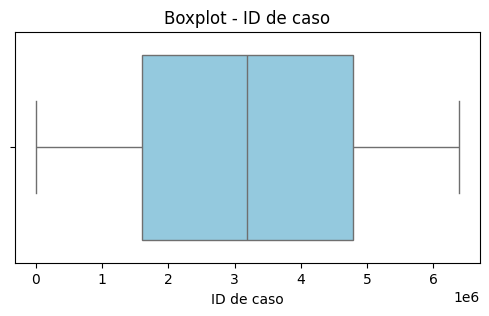

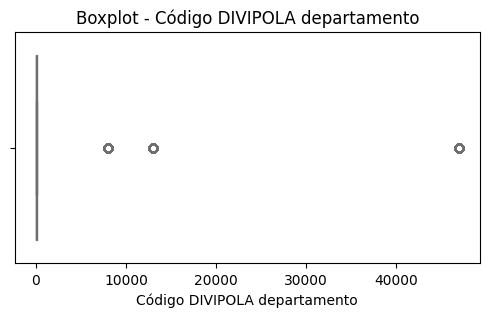

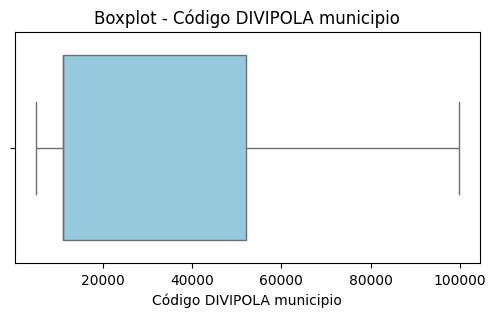

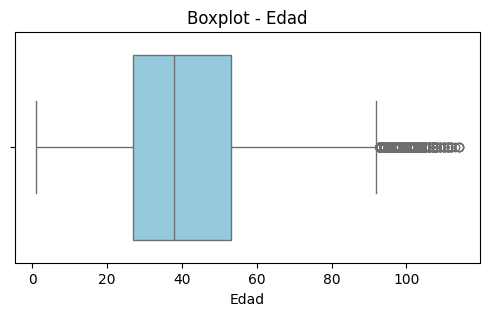

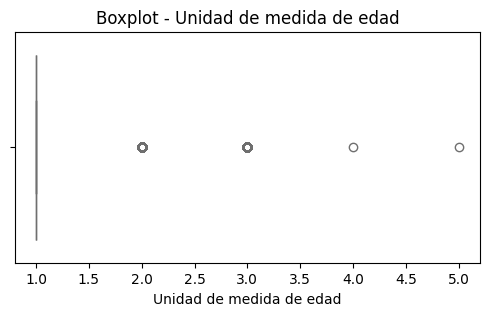

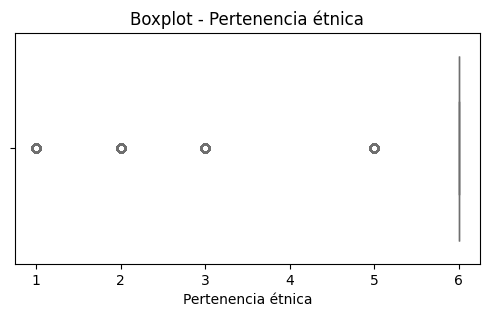

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot - {col}")
    plt.show()


In [118]:
# Verificar cuántas edades negativas hay para definir si se hace imputación o eliminación de registros
print("Cantidad de edades negativas:", (df["Edad"] < 0).sum())

Cantidad de edades negativas: 0


In [119]:
# Revisión de valores atípicos en Edad
## - El rango aceptado por IQR fue: [-12, 92]
## - Aunque el límite inferior resultó negativo, no existen registros con edades < 0 en la BD
## - Por lo tanto, no fue necesario realizar imputación o eliminación de registros en este caso

In [123]:
# Lista de códigos válidos de departamentos
codigos_validos = [5, 8, 11, 13, 15, 17, 18, 19, 20, 23, 25, 27, 41, 
                   44, 47, 50, 52, 54, 63, 66, 68, 70, 73, 76, 81, 85, 
                   86, 88, 91, 94, 95, 97, 99]

# Reemplazar valores inválidos con NaN
df.loc[~df["Código DIVIPOLA departamento"].isin(codigos_validos), "Código DIVIPOLA departamento"] = np.nan

# Ver cuántos quedaron como NaN
print("Valores nulos en departamento:", df["Código DIVIPOLA departamento"].isna().sum())

# Revisar valores únicos después de la limpieza
print("Valores únicos en departamento:", df["Código DIVIPOLA departamento"].unique())


Valores nulos en departamento: 526240
Valores únicos en departamento: [76.  5. 68. 54. 17. 11. 25. 18. 63. 66. 85. 52. 41. 20. 50. nan 73. 19.
 70. 13. 44.  8. 23. 47. 81. 15. 88. 27. 95. 99. 86. 97. 94. 91.]


In [124]:
# Revisar rango de códigos de municipios
print("Mínimo:", df["Código DIVIPOLA municipio"].min())
print("Máximo:", df["Código DIVIPOLA municipio"].max())

Mínimo: 5001
Máximo: 99773


In [125]:
# En este caso, no se encontraron valores fuera del rango esperado, por lo que no se realizaron cambios adicionales en la columna.

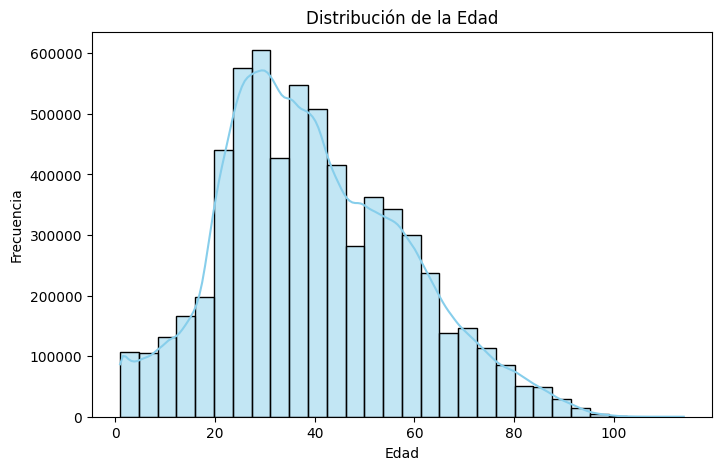

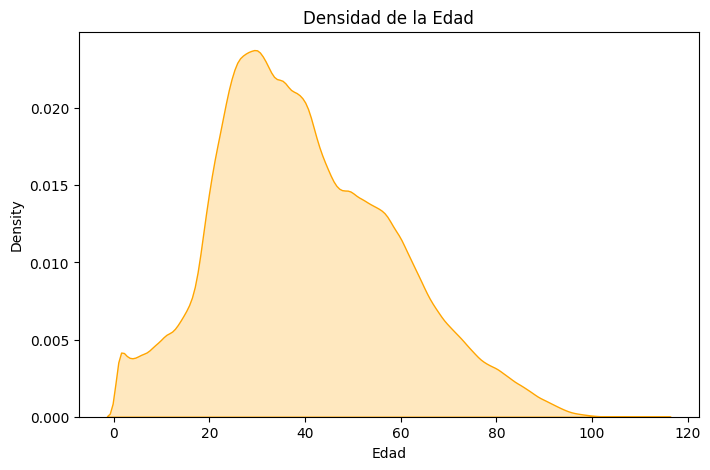

Asimetría (Skewness): 0.39
Curtosis: -0.21


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

# Histograma + curva de densidad
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Gráfica de densidad (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(df['Edad'].dropna(), fill=True, color='orange')
plt.title("Densidad de la Edad")
plt.xlabel("Edad")
plt.show()

# Estadísticos de forma
edad = df['Edad'].dropna()
print(f"Asimetría (Skewness): {skew(edad):.2f}")
print(f"Curtosis: {kurtosis(edad):.2f}")

# Ejemplo de transformación logarítmica (si hay sesgo fuerte)
df['Edad_log'] = np.log1p(df['Edad'])  # log(edad+1)


In [ ]:
# Análisis de la variable Edad
# - La distribución se inclina un poco hacia la derecha (personas de mayor edad)
# - Tiene una forma parecida a la normal, sin colas muy raras
# - La mayoría está entre 20 y 40 años, con un pico en 20-35
# - Después de los 60 años la frecuencia baja poco a poco
# - En conclusión: se parece bastante a una normal, con un ligero sesgo, por lo que no es necesario aplicar transformaciones.

# Las demás variables numéricas no se analizan en detalle, ya que no son de interés principal en este estudio. 
# Además, muchas de ellas representan categorías o conteos (por ejemplo, los códigos DIVIPOLA de departamentos y municipios), 
# por lo que no requieren un análisis estadístico profundo.


Estadísticos descriptivos de variables categóricas:


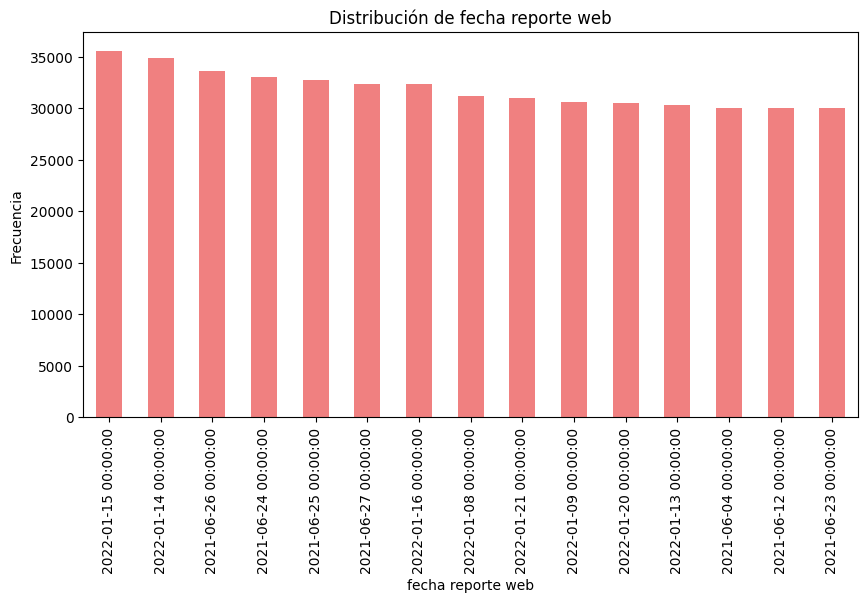

🔸 fecha reporte web: 869 categorías
fecha reporte web
2022-01-15 00:00:00    0.005570
2022-01-14 00:00:00    0.005468
2021-06-26 00:00:00    0.005259
2021-06-24 00:00:00    0.005166
2021-06-25 00:00:00    0.005125
Name: proportion, dtype: float64 



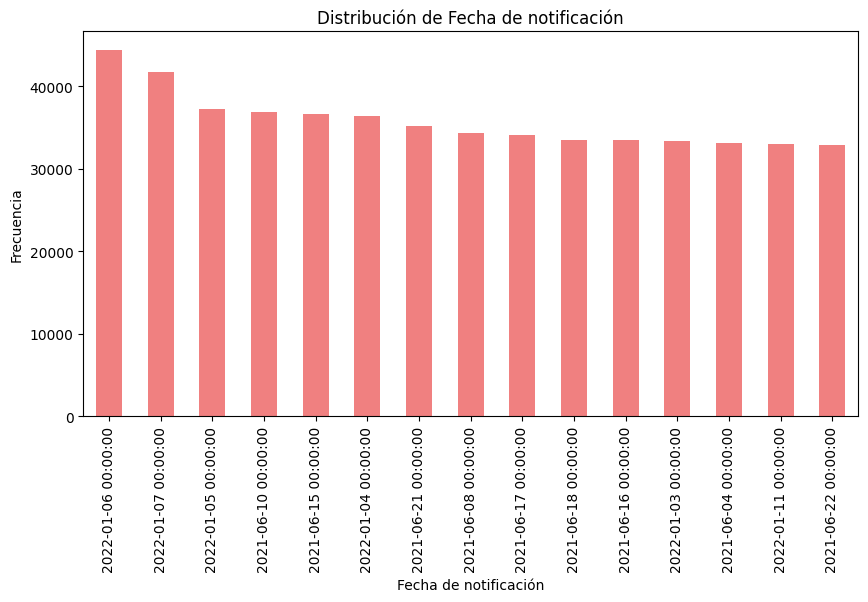

🔸 Fecha de notificación: 1392 categorías
Fecha de notificación
2022-01-06 00:00:00    0.006955
2022-01-07 00:00:00    0.006530
2022-01-05 00:00:00    0.005839
2021-06-10 00:00:00    0.005774
2021-06-15 00:00:00    0.005731
Name: proportion, dtype: float64 



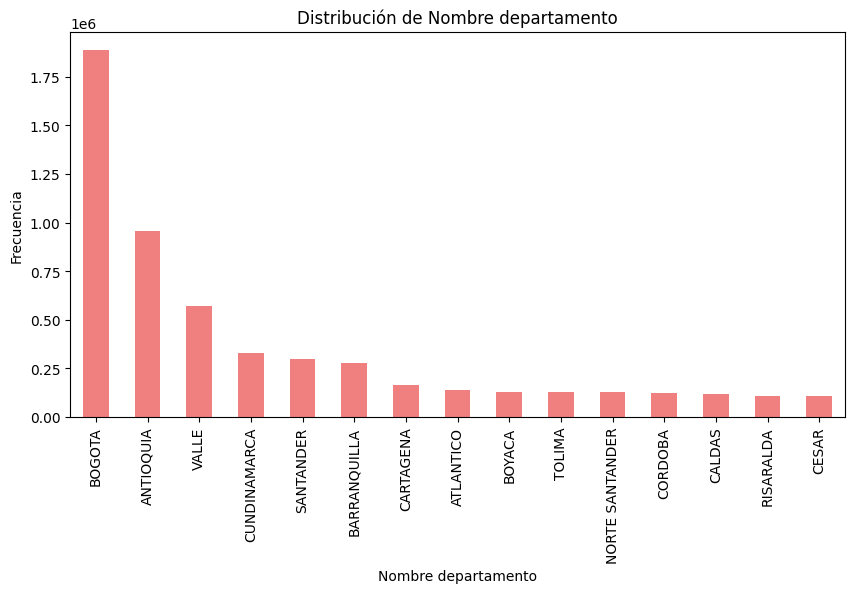

🔸 Nombre departamento: 41 categorías
Nombre departamento
BOGOTA          0.295410
ANTIOQUIA       0.149504
VALLE           0.089557
CUNDINAMARCA    0.051851
SANTANDER       0.046523
Name: proportion, dtype: float64 



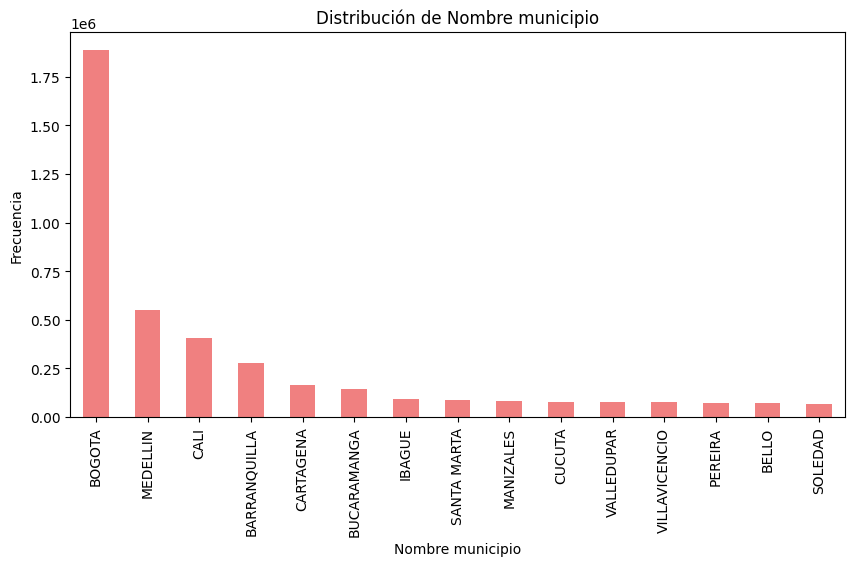

🔸 Nombre municipio: 1057 categorías
Nombre municipio
BOGOTA          0.295410
MEDELLIN        0.086197
CALI            0.063588
BARRANQUILLA    0.043515
CARTAGENA       0.025597
Name: proportion, dtype: float64 



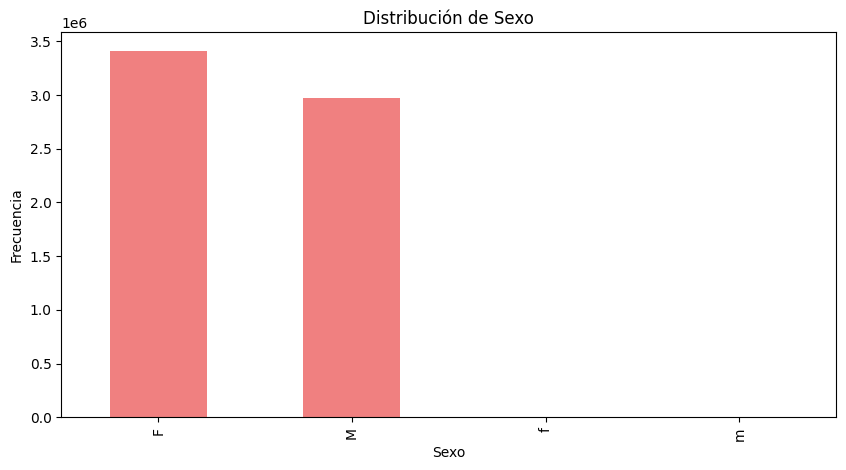

🔸 Sexo: 4 categorías
Sexo
F    5.346480e-01
M    4.653502e-01
f    9.393868e-07
m    9.393868e-07
Name: proportion, dtype: float64 



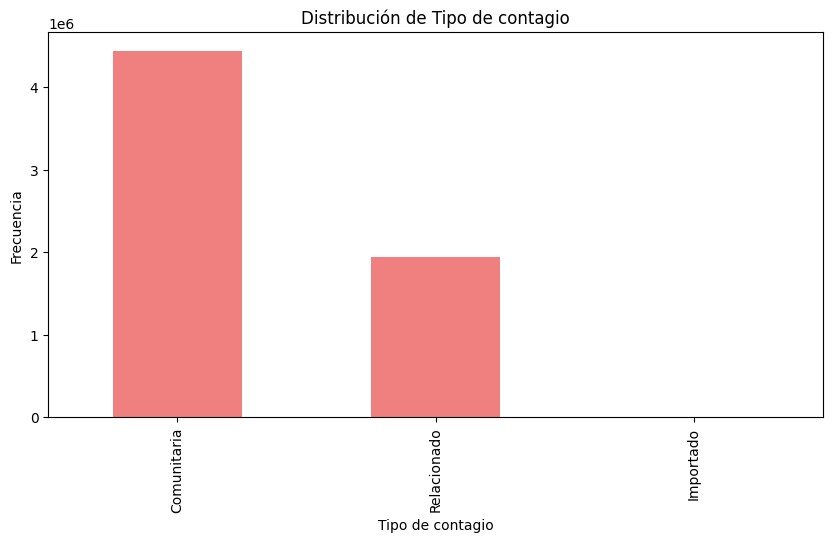

🔸 Tipo de contagio: 3 categorías
Tipo de contagio
Comunitaria    0.695760
Relacionado    0.303661
Importado      0.000579
Name: proportion, dtype: float64 



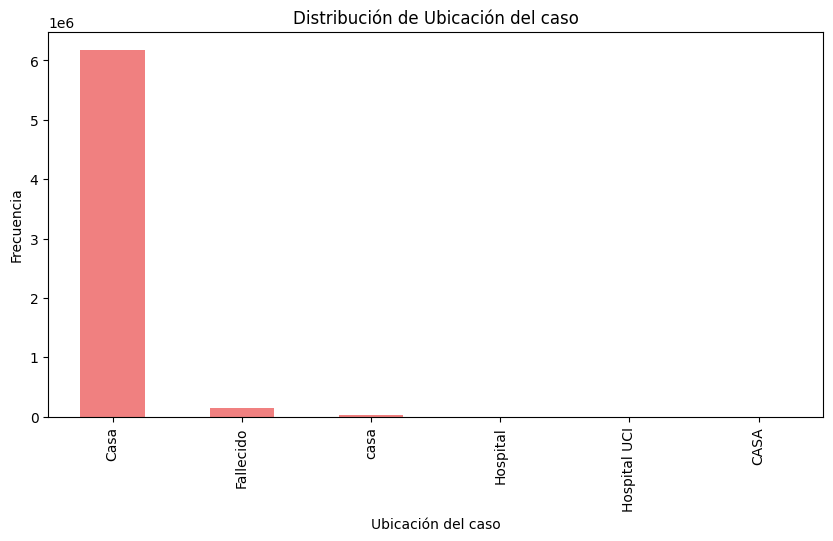

🔸 Ubicación del caso: 6 categorías
Ubicación del caso
Casa            0.972923
Fallecido       0.022551
casa            0.004463
Hospital        0.000057
Hospital UCI    0.000006
Name: proportion, dtype: float64 



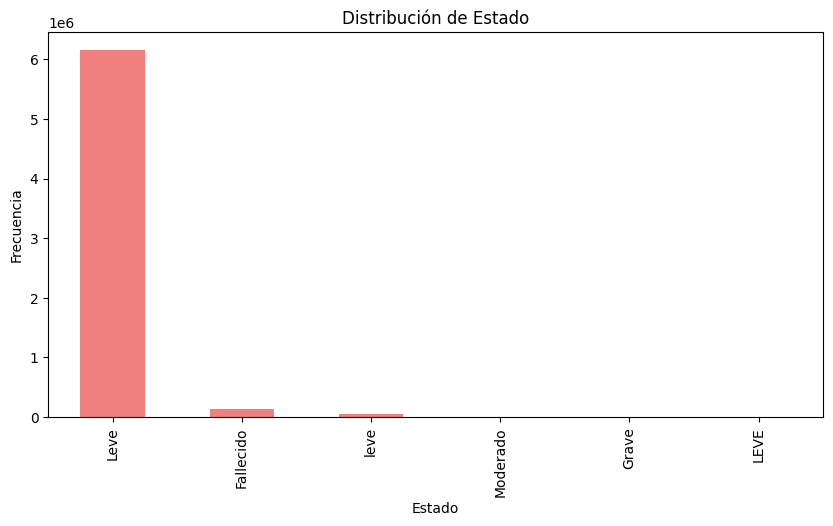

🔸 Estado: 6 categorías
Estado
Leve         0.969410
Fallecido    0.022551
leve         0.007976
Moderado     0.000057
Grave        0.000006
Name: proportion, dtype: float64 



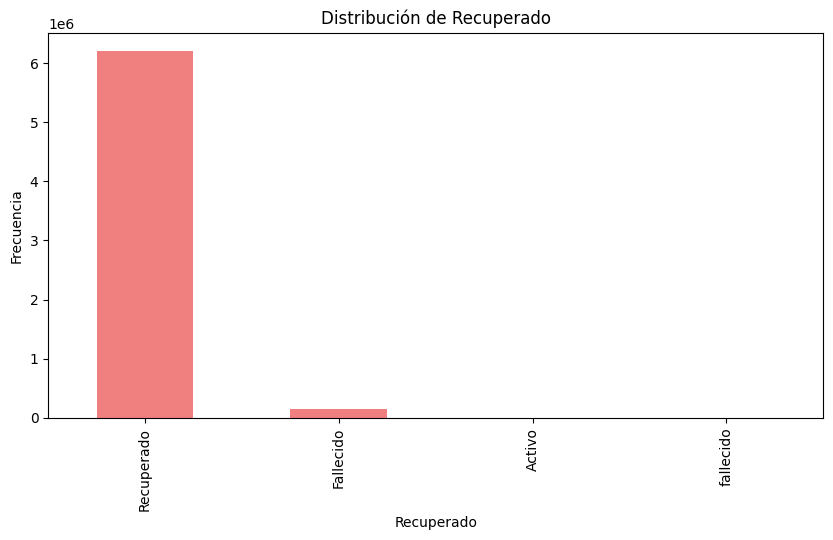

🔸 Recuperado: 4 categorías
Recuperado
Recuperado    0.977306
Fallecido     0.022487
Activo        0.000161
fallecido     0.000046
Name: proportion, dtype: float64 



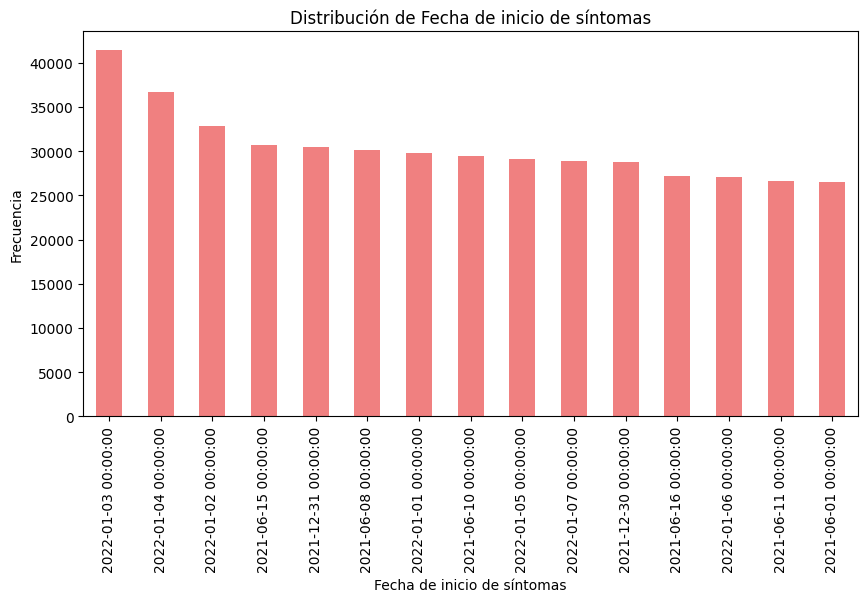

🔸 Fecha de inicio de síntomas: 1397 categorías
Fecha de inicio de síntomas
2022-01-03 00:00:00    0.007053
2022-01-04 00:00:00    0.006240
2022-01-02 00:00:00    0.005593
2021-06-15 00:00:00    0.005210
2021-12-31 00:00:00    0.005182
Name: proportion, dtype: float64 



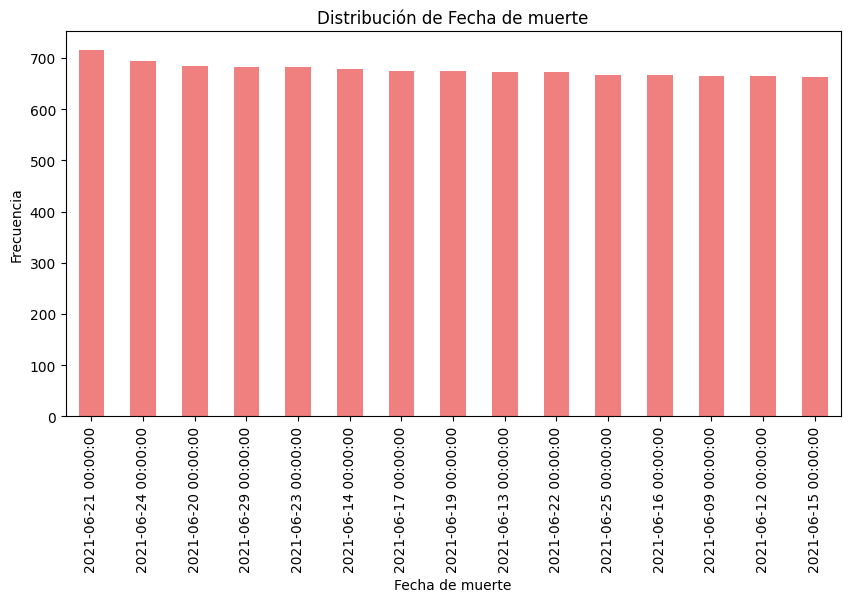

🔸 Fecha de muerte: 1370 categorías
Fecha de muerte
2021-06-21 00:00:00    0.003885
2021-06-24 00:00:00    0.003765
2021-06-20 00:00:00    0.003711
2021-06-29 00:00:00    0.003700
2021-06-23 00:00:00    0.003700
Name: proportion, dtype: float64 



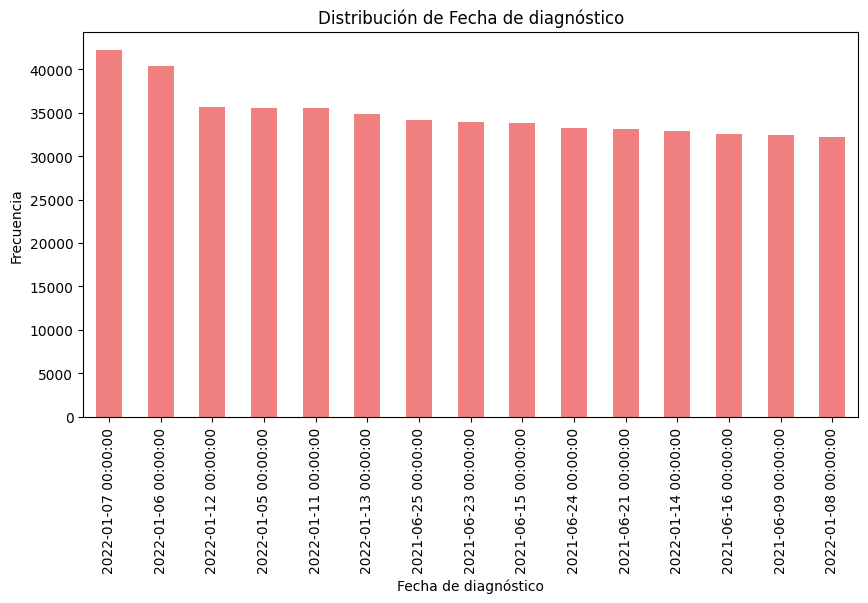

🔸 Fecha de diagnóstico: 1389 categorías
Fecha de diagnóstico
2022-01-07 00:00:00    0.006607
2022-01-06 00:00:00    0.006320
2022-01-12 00:00:00    0.005578
2022-01-05 00:00:00    0.005568
2022-01-11 00:00:00    0.005560
Name: proportion, dtype: float64 



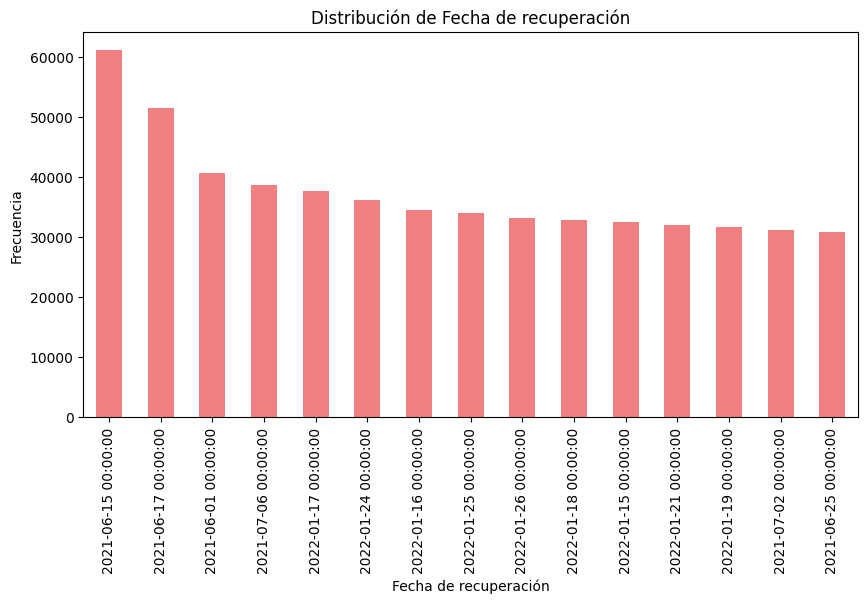

🔸 Fecha de recuperación: 966 categorías
Fecha de recuperación
2021-06-15 00:00:00    0.009834
2021-06-17 00:00:00    0.008292
2021-06-01 00:00:00    0.006542
2021-07-06 00:00:00    0.006228
2022-01-17 00:00:00    0.006070
Name: proportion, dtype: float64 



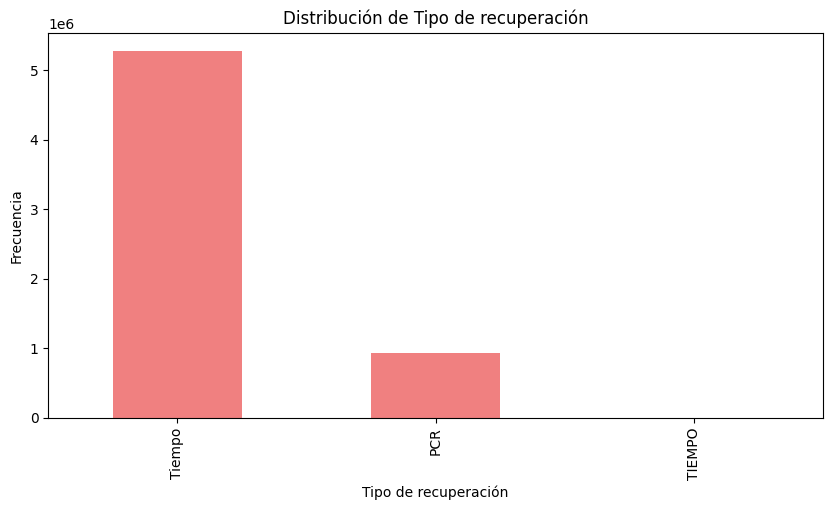

🔸 Tipo de recuperación: 3 categorías
Tipo de recuperación
Tiempo    0.849484
PCR       0.150443
TIEMPO    0.000073
Name: proportion, dtype: float64 



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis

# Separar variables categóricas
cat_cols = df.select_dtypes(include=['object','category']).columns

print("\nEstadísticos descriptivos de variables categóricas:")

for col in cat_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", color="lightcoral")
    plt.title(f"Distribución de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.show()
    
    print(f"🔸 {col}: {df[col].nunique()} categorías")


In [ ]:
# A partir de las gráficas se puede observar que algunas categorías presentan inconsistencias debido a errores tipográficos 
# o diferencias en mayúsculas/minúsculas. Por ejemplo: ("Tiempo" y "TIEMPO"), ("Fallecido" y "fallecido"), ("Leve", "LEVE" y "leve"). 
# # Estas categorías deben ser corregidas y unificadas para garantizar la calidad de los datos.

In [142]:
# Corrección de categorías inconsistentes

# Tipo de recuperación:  unificar "Tiempo" y "TIEMPO"
df["Tipo de recuperación"] = (
    df["Tipo de recuperación"]
    .str.strip()
    .str.lower()
    .replace({"TIEMPO": "Tiempo", "pcr": "PCR"})
    .str.title()
)
# Corrección final: evitar que "PCR" se convierta en "Pcr"
df["Tipo de recuperación"] = df["Tipo de recuperación"].replace({"Pcr": "PCR"})

# Recuperado: unificar "Fallecido" y "fallecido"
df["Recuperado"] = df["Recuperado"].str.strip().str.capitalize()

# Estado: unificar "Leve, LEVE, leve"
df["Estado"] = df["Estado"].str.strip().str.capitalize()

# Estado: unificar todo mayusculas
df["Sexo"] = df["Sexo"].str.strip().str.upper()    

# Ubicación del caso: unificar "Casa, casa, CASA"
df["Ubicación del caso"] = df["Ubicación del caso"].str.strip().str.capitalize()

# Verificación de cambios
print("Valores únicos en Tipo de recuperación:", df["Tipo de recuperación"].unique())
print("Valores únicos en Recuperado:", df["Recuperado"].unique())
print("Valores únicos en Estado:", df["Estado"].unique())
print("Valores únicos en Estado:", df["Sexo"].unique())
print("Valores únicos en Ubicación del caso:", df["Ubicación del caso"].unique())

Valores únicos en Tipo de recuperación: ['Tiempo' nan 'PCR']
Valores únicos en Recuperado: ['Recuperado' 'Fallecido' nan 'Activo']
Valores únicos en Estado: ['Leve' 'Fallecido' nan 'Moderado' 'Grave']
Valores únicos en Estado: ['F' 'M']
Valores únicos en Ubicación del caso: ['Casa' 'Fallecido' nan 'Hospital' 'Hospital uci']


/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_46110/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


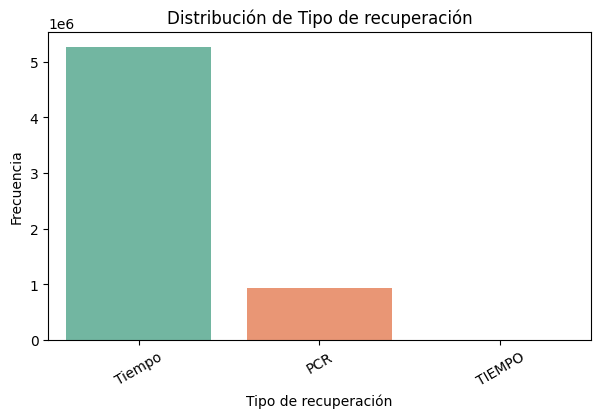

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_46110/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


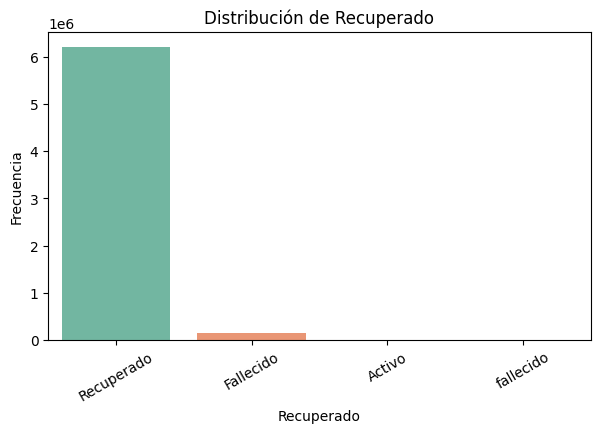

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_46110/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


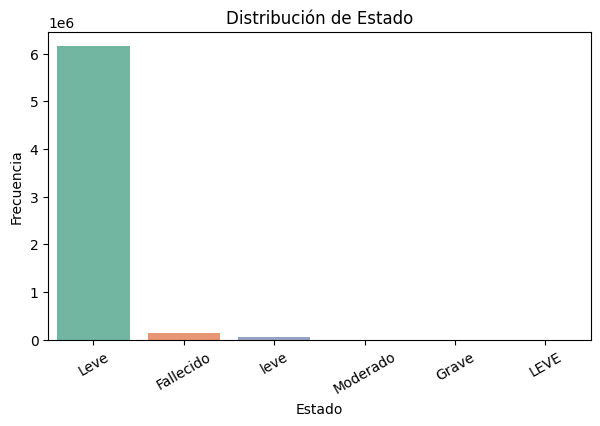

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_46110/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


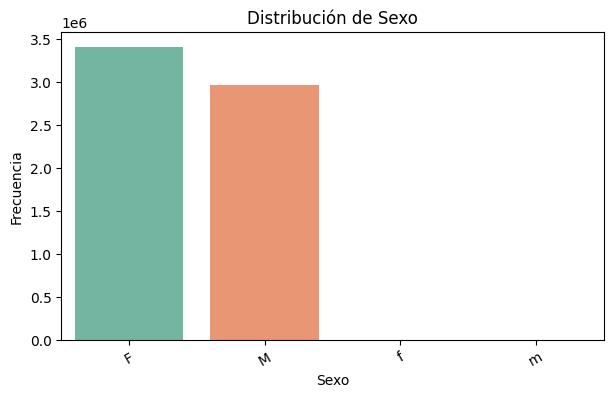

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_46110/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


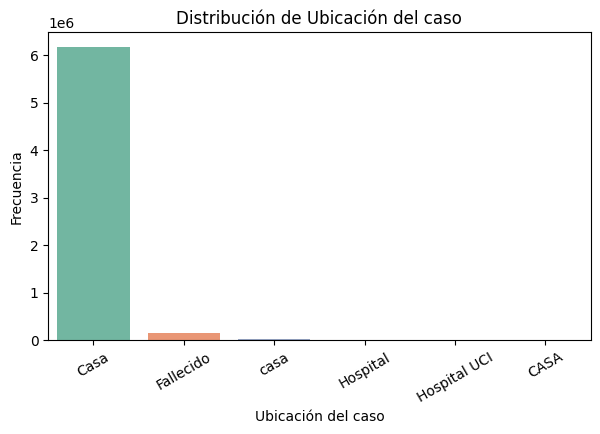

In [19]:
# Ahora graficaremos nuevamente las variables categóricas para verificar que las correcciones se aplicaron correctamente

import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas corregidas
cols_corr = ["Tipo de recuperación", "Recuperado", "Estado", "Sexo", "Ubicación del caso"]

for col in cols_corr:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Distribución de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.show()


In [ ]:
# En este caso, se corrigieron las inconsistencias en las categorías de las variables seleccionadas, ahora vamos a analizar las que son tipo fecha
# para verificar que no haya errores o inconsistencias en los formatos.

Corregir datos tipo date

In [ ]:
df["fecha reporte web"] = pd.to_datetime(df["fecha reporte web"]).dt.to_period("M")

print("Valores fecha reporte web", df.groupby("fecha reporte web").size().reindex(name=))

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [14]:
df["Fecha de notificación"] = pd.to_datetime(df["Fecha de notificación"]).dt.date
print("Valores fecha notificacion", df["Fecha de notificación"].unique())

Valores fecha notificacion [datetime.date(2020, 12, 22) datetime.date(2020, 12, 19)
 datetime.date(2020, 12, 15) ... datetime.date(2022, 10, 9)
 datetime.date(2022, 4, 4) datetime.date(2022, 3, 20)]


In [15]:
df["Fecha de inicio de síntomas"] = pd.to_datetime(df["Fecha de inicio de síntomas"]).dt.date
print("Valores fecha inicio de sintomas", df["Fecha de inicio de síntomas"].unique())

Valores fecha inicio de sintomas [datetime.date(2020, 12, 21) datetime.date(2020, 12, 7)
 datetime.date(2020, 12, 18) ... datetime.date(2022, 3, 26)
 datetime.date(2022, 3, 27) datetime.date(2022, 3, 25)]


In [16]:
df["Fecha de diagnóstico"] = pd.to_datetime(df["Fecha de diagnóstico"]).dt.date
print("Valores fecha diagnostico", df["Fecha de diagnóstico"].unique())

Valores fecha diagnostico [datetime.date(2020, 12, 23) datetime.date(2020, 12, 22)
 datetime.date(2020, 12, 12) ... datetime.date(2022, 3, 17)
 datetime.date(2022, 3, 20) datetime.date(2022, 3, 28)]


In [17]:
df["Fecha de recuperación"] = pd.to_datetime(df["Fecha de recuperación"]).dt.date
print("Valores fecha recuperacion", df["Fecha de recuperación"].unique())

Valores fecha recuperacion [datetime.date(2021, 1, 4) datetime.date(2020, 12, 25)
 datetime.date(2021, 1, 1) NaT datetime.date(2020, 12, 28)
 datetime.date(2020, 12, 30) datetime.date(2021, 4, 23)
 datetime.date(2021, 1, 2) datetime.date(2020, 12, 27)
 datetime.date(2021, 4, 25) datetime.date(2020, 11, 15)
 datetime.date(2021, 3, 10) datetime.date(2021, 4, 28)
 datetime.date(2020, 12, 31) datetime.date(2021, 4, 27)
 datetime.date(2021, 1, 9) datetime.date(2020, 12, 26)
 datetime.date(2020, 8, 24) datetime.date(2020, 12, 9)
 datetime.date(2021, 3, 25) datetime.date(2020, 11, 20)
 datetime.date(2021, 3, 12) datetime.date(2021, 3, 22)
 datetime.date(2021, 1, 13) datetime.date(2020, 8, 12)
 datetime.date(2020, 10, 31) datetime.date(2020, 8, 25)
 datetime.date(2020, 8, 26) datetime.date(2021, 1, 25)
 datetime.date(2020, 8, 6) datetime.date(2020, 7, 31)
 datetime.date(2020, 8, 5) datetime.date(2020, 8, 1)
 datetime.date(2020, 8, 13) datetime.date(2020, 8, 15)
 datetime.date(2020, 8, 17) date

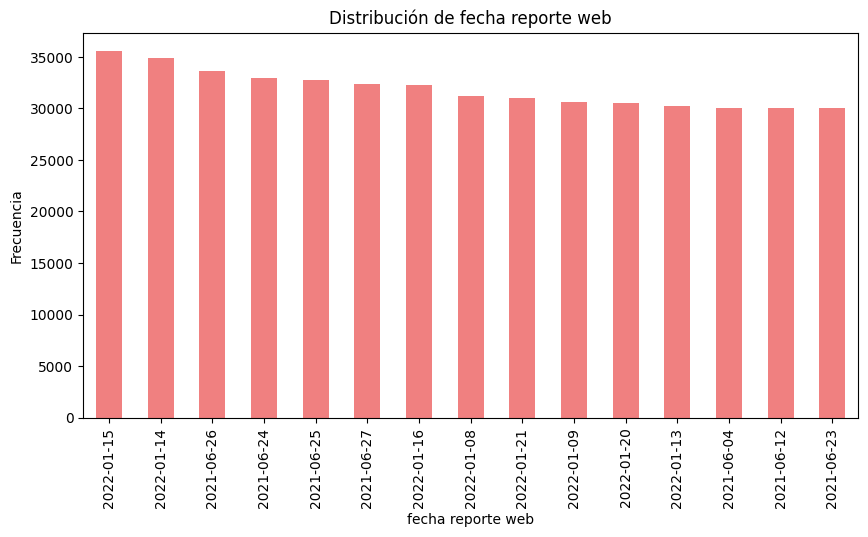

🔸 fecha reporte web: 869 categorías


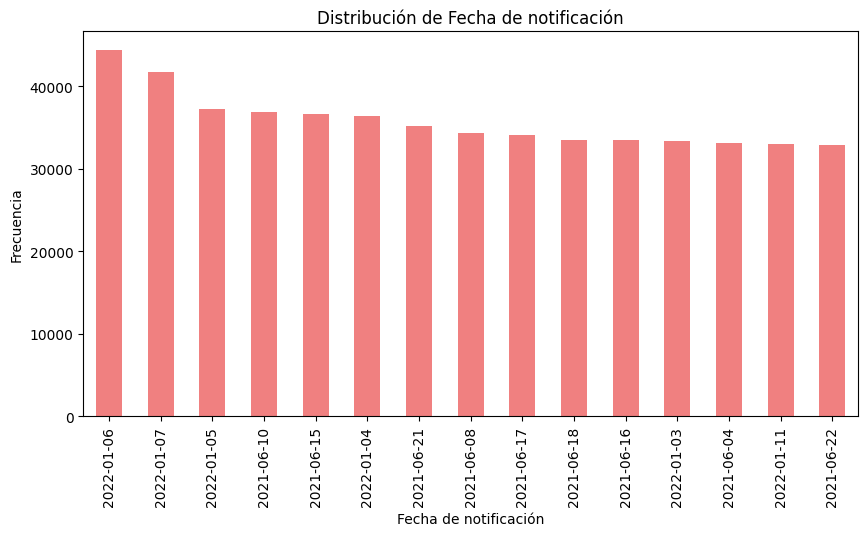

🔸 Fecha de notificación: 1392 categorías


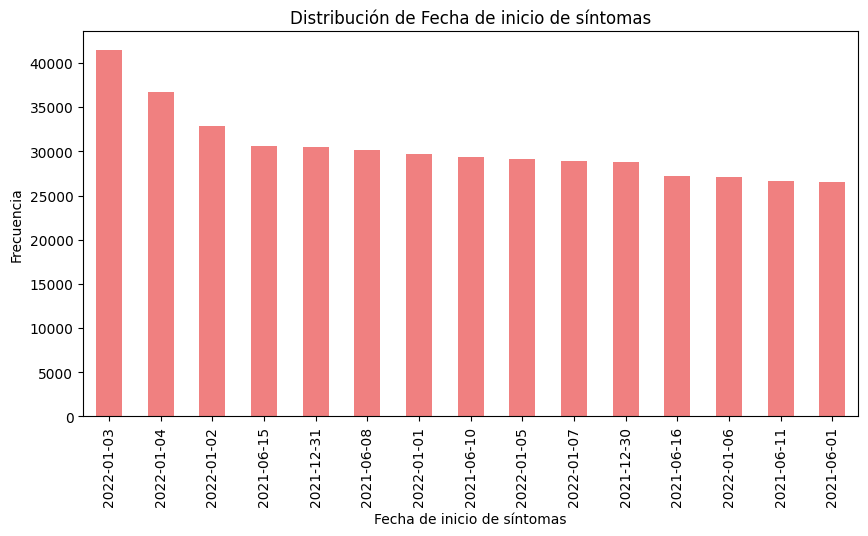

🔸 Fecha de inicio de síntomas: 1397 categorías


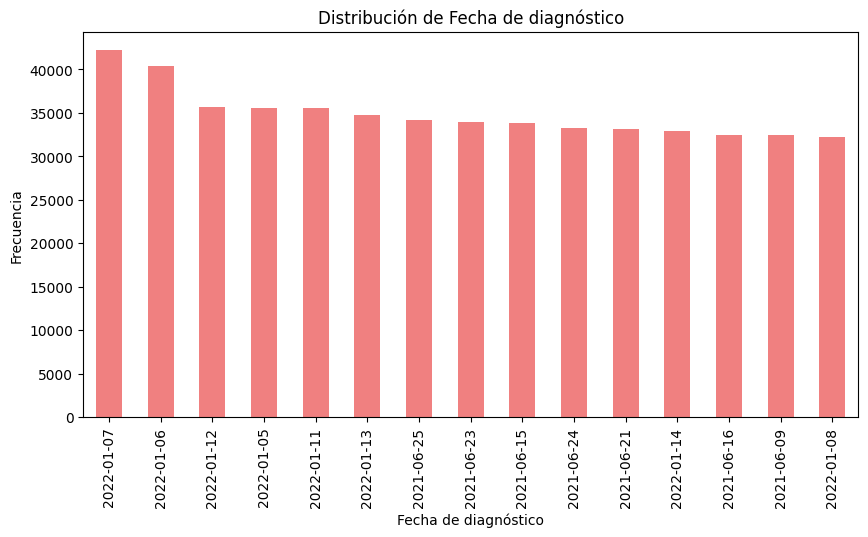

🔸 Fecha de diagnóstico: 1388 categorías


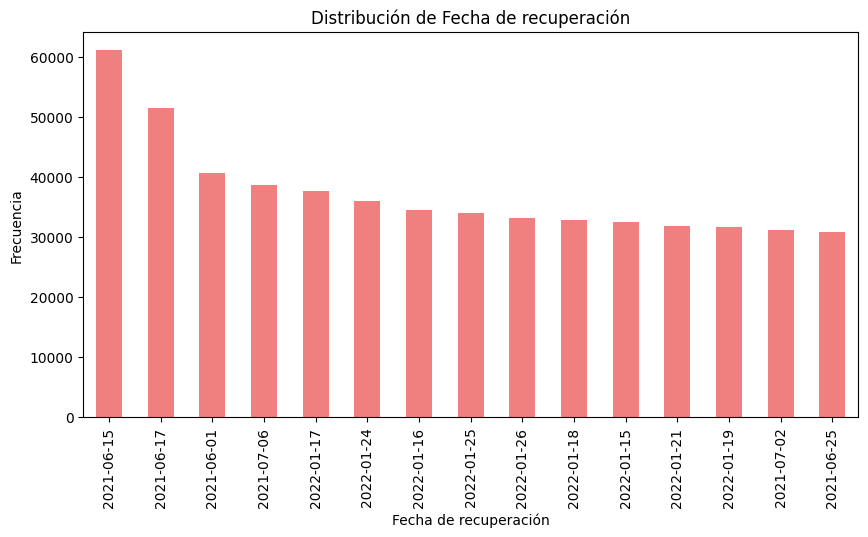

🔸 Fecha de recuperación: 966 categorías


In [21]:
cols_corr = ["fecha reporte web", "Fecha de notificación", "Fecha de inicio de síntomas", "Fecha de diagnóstico", "Fecha de recuperación"]
for col in cols_corr:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", color="lightcoral")
    plt.title(f"Distribución de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.show()
    
    print(f"🔸 {col}: {df[col].nunique()} categorías")